In [23]:
import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [24]:
def process_text(text):
    words = WhitespaceTokenizer().tokenize(text)

    lexical_diversity = len(set(words)) / len(words) * 100
    print('Лексическое разнообразие: ', lexical_diversity)

    tagged = nltk.pos_tag(words)
    parts_speech = Counter(tag for word,tag in tagged)
    print('Количество частей речи: ', parts_speech)

    total_speech = sum(parts_speech.values())
    proportion = dict((word, float(count)/total_speech) for word,count in parts_speech.items())
    print('% частей речи в тексте, разделенный на 100: ', proportion)

    my_stop = ['--', '-', '—', '–','это', 'том', 'то', 'того']
    stop = stopwords.words('russian') + my_stop
    filtered_words = [word for word in words if word.lower() not in stop]

    fdist_words = FreqDist(filtered_words)
    print('Cамые частые слова: ', fdist_words.most_common(10))

    filtered_text = " ".join(filtered_words)
    wordcloud = WordCloud().generate(filtered_text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Лексическое разнообразие:  45.237059591126574
Количество частей речи:  Counter({'NNP': 22946, 'JJ': 1492, 'NN': 417, ':': 398, 'VBP': 11, 'CD': 11, 'VBD': 9, 'DT': 2, 'PRP': 1, 'POS': 1, 'VBZ': 1})
% частей речи в тексте, разделенный на 100:  {'JJ': 0.058997983312902846, 'NNP': 0.9073510221835581, 'PRP': 3.9542884257977775e-05, ':': 0.015738067934675155, 'VBP': 0.00043497172683775554, 'NN': 0.016489382735576732, 'DT': 7.908576851595555e-05, 'POS': 3.9542884257977775e-05, 'CD': 0.00043497172683775554, 'VBD': 0.00035588595832179997, 'VBZ': 3.9542884257977775e-05}
Cамые частые слова:  [('Ганин', 113), ('сказал', 55), ('очень', 51), ('Ганин,', 44), ('и,', 34), ('Подтягин', 33), ('Клара', 32), ('Алферов', 30), ('Антон', 28), ('Машенька', 27)]


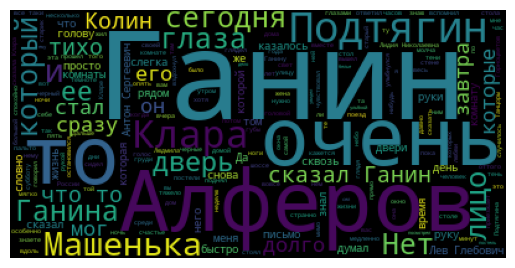

Лексическое разнообразие:  49.755557605386954
Количество частей речи:  Counter({'NNP': 10637, 'JJ': 142, 'CD': 16, 'NN': 15, 'VBD': 11, ':': 10, 'PRP': 2, 'SYM': 2, 'VBZ': 2, 'VBP': 1, 'FW': 1, 'NNS': 1, 'RB': 1})
% частей речи в тексте, разделенный на 100:  {'JJ': 0.013098422654736649, 'NNP': 0.9811825477354488, 'PRP': 0.00018448482612305137, 'VBP': 9.224241306152569e-05, 'CD': 0.001475878608984411, ':': 0.0009224241306152569, 'NN': 0.0013836361959228853, 'SYM': 0.00018448482612305137, 'FW': 9.224241306152569e-05, 'VBZ': 0.00018448482612305137, 'VBD': 0.0010146665436767826, 'NNS': 9.224241306152569e-05, 'RB': 9.224241306152569e-05}
Cамые частые слова:  [('Кречмар', 49), ('Магда', 39), ('и,', 29), ('сказал', 26), ('очень', 25), ('он,', 23), ('сказала', 17), ('Макс', 17), ('Кречмар,', 15), ('своей', 14)]


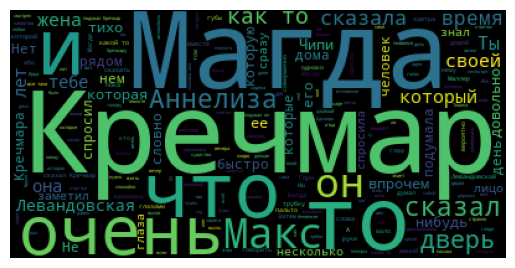

Лексическое разнообразие:  39.108550084270945
Количество частей речи:  Counter({'NNP': 43365, 'JJ': 477, 'VBZ': 25, 'CD': 14, 'NN': 12, 'VBD': 9, 'VBP': 2, 'PRP': 1, ')': 1})
% частей речи в тексте, разделенный на 100:  {'JJ': 0.01086411879925295, 'NN': 0.00027331116476108047, 'PRP': 2.2775930396756706e-05, 'VBP': 4.555186079351341e-05, 'NNP': 0.9876782216553546, 'VBZ': 0.0005693982599189177, 'VBD': 0.00020498337357081038, 'CD': 0.0003188630255545939, ')': 2.2775930396756706e-05}
Cамые частые слова:  [('мнe', 217), ('сказал', 103), ('я,', 84), ('меня,', 68), ('очень', 57), ('мое', 53), ('всe', 48), ('и,', 46), ('гдe', 45), ('Лида', 45)]


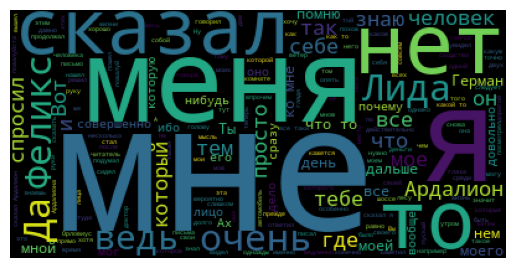

Лексическое разнообразие:  38.45937982320752
Количество частей речи:  Counter({'NNP': 110707, 'JJ': 1822, 'CD': 630, 'VBD': 327, 'NN': 284, 'FW': 120, ':': 58, 'VBZ': 21, 'SYM': 15, '$': 13, 'VBP': 9, 'IN': 8, 'NNS': 5, 'JJS': 3, 'VB': 2, 'DT': 2, 'MD': 1, 'TO': 1, 'VBG': 1, 'CC': 1, 'RBR': 1, 'PRP': 1})
% частей речи в тексте, разделенный на 100:  {'JJ': 0.01597797109583275, 'NNP': 0.9708415181703381, 'VBD': 0.0028676161077592255, 'CD': 0.005524764978251719, 'NN': 0.002490528974322997, ':': 0.000508629156727936, 'FW': 0.0010523361863336608, 'JJS': 2.630840465834152e-05, 'NNS': 4.384734109723586e-05, 'VBP': 7.892521397502456e-05, 'SYM': 0.0001315420232917076, 'IN': 7.015574575557738e-05, 'MD': 8.769468219447172e-06, 'VB': 1.7538936438894344e-05, 'TO': 8.769468219447172e-06, 'VBZ': 0.00018415883260839062, 'DT': 1.7538936438894344e-05, 'VBG': 8.769468219447172e-06, 'CC': 8.769468219447172e-06, 'RBR': 8.769468219447172e-06, '$': 0.00011400308685281324, 'PRP': 8.769468219447172e-06}
Cамые 

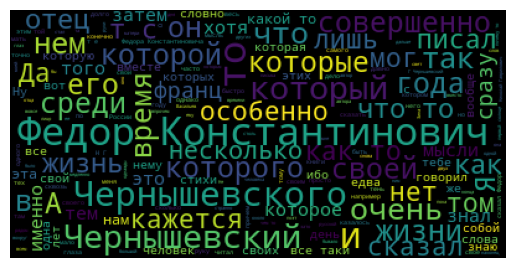

Лексическое разнообразие:  38.166419483256576
Количество частей речи:  Counter({'NNP': 96244, 'JJ': 2519, 'NN': 1741, ':': 1420, 'CD': 144, 'FW': 136, 'VBD': 112, 'SYM': 50, 'VBZ': 28, 'VBP': 24, 'NNS': 22, 'IN': 15, 'JJS': 7, 'POS': 7, 'CC': 4, 'RB': 3, 'PRP': 3, 'DT': 2, 'MD': 2, 'VB': 2, 'JJR': 1, ',': 1, '.': 1})
% частей речи в тексте, разделенный на 100:  {'JJ': 0.02457848723753025, 'NNP': 0.9390757942393256, 'CD': 0.0014050425415658419, ':': 0.013855280618218719, 'NN': 0.01698735461712591, 'VBD': 0.0010928108656623214, 'SYM': 0.00048786199359925064, 'IN': 0.00014635859807977518, 'JJS': 6.830067910389509e-05, 'VBP': 0.0002341737569276403, 'VBZ': 0.00027320271641558035, 'FW': 0.0013269846225899618, 'NNS': 0.0002146592771836703, 'DT': 1.9514479743970027e-05, 'MD': 1.9514479743970027e-05, 'VB': 1.9514479743970027e-05, 'POS': 6.830067910389509e-05, 'JJR': 9.757239871985014e-06, 'CC': 3.9028959487940054e-05, ',': 9.757239871985014e-06, 'RB': 2.927171961595504e-05, 'PRP': 2.92717196159

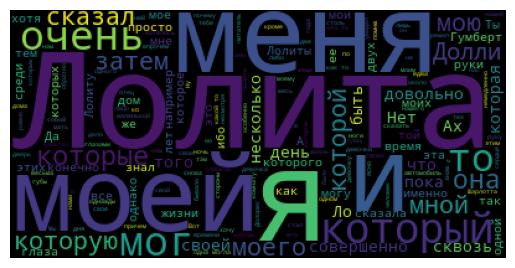

Лексическое разнообразие:  50.29691211401425
Количество частей речи:  Counter({'NNP': 23112, 'JJ': 206, 'NN': 74, 'CD': 54, 'VBD': 46, 'FW': 31, ':': 22, 'SYM': 8, 'IN': 4, 'NNS': 4, 'VB': 3, 'VBZ': 3, 'VBP': 3, '$': 2, 'MD': 2, 'PRP': 2})
% частей речи в тексте, разделенный на 100:  {'JJ': 0.008737699355276553, 'NNP': 0.9803189684424839, 'VBD': 0.0019511367492365116, 'CD': 0.002290464879538514, 'NN': 0.003138785205293519, 'SYM': 0.00033932813030200206, ':': 0.0009331523583305056, 'FW': 0.0013148965049202578, '$': 8.483203257550051e-05, 'MD': 8.483203257550051e-05, 'VB': 0.00012724804886325077, 'VBZ': 0.00012724804886325077, 'IN': 0.00016966406515100103, 'NNS': 0.00016966406515100103, 'VBP': 0.00012724804886325077, 'PRP': 8.483203257550051e-05}
Cамые частые слова:  [('Хью', 99), ('Арманда', 35), ('Персон', 32), ('время', 26), ('R.', 26), ('слишком', 25), ('сказал', 24), ('своей', 23), ('которые', 21), ('того,', 21)]


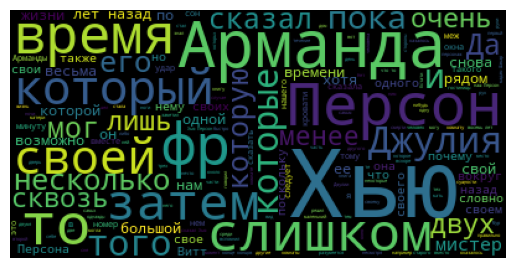

In [25]:
Mashenka = open("c:\\Users\\maria\\Downloads\\Nabokov_Mashenka.txt").read() #Машенька (1926)
Camera = open("c:\\Users\\maria\\Downloads\\Camera_Obscura.txt").read() # Камера обскура (1932)
Despair = open("c:\\Users\\maria\\Downloads\\Nabokov_-_Otchayanie.txt").read() # Отчаяние (1934)
Gift = open("c:\\Users\\maria\\Downloads\\Dar.txt").read() # Дар (1938)
Lolita = open("c:\\Users\\maria\\Downloads\\Lolita1.txt").read() #Лолита (1955)
Transparent = open("c:\\Users\\maria\\Downloads\\Prozrachnye_predmety.txt").read() #Прозрачные предметы (1972)

process_text(Mashenka)
process_text(Camera)
process_text(Despair)
process_text(Gift)
process_text(Lolita)
process_text(Transparent)